# 모델의 일반화 성능 향상 시키기
- 데이터가 충분한지 확인하기. 입력->출력 매핑 공간을 조밀하게 샘플링해야 함. 대용량의 데이터는 모델이 성능이 좋아짐.
- 레이블 할당 에러를 최소화하기. 입력을 시각화하여 이상치확인 및 레이블 교정을 해야함.
- 데이터를 정제하고, 결측치 처리하기.
- 특성 중 유효한 특성만 선택하여 모델링하기.

## 특성 공학  
**특성공학**이란 머신러닝 프로젝트에서 훈련에 사용할 좋은 데이터(특성)들을 찾는 것
1. 특성선택 : 가지고 있는 특성 중 모델 훈련에 적합한 것을 선택
2. 특성추출 : 가지고 있는 특성으로 더 유용한 특성을 생성

## 조기 종료
딥러닝 모델에서 모델을 끝까지 훈련하면 일반화가 되지 않을 것임. 그러므로 훈련이 최솟값에 도달하기 전에 훈련을 중단하게 됨.  
훈련 중 일반화 성능이 가장 좋은 최적의 적합 지점을 찾는 것이 중요함.  
앞에서는 필요 이상의 에포크까지 학습을 진행하고 최적지점에서 다시 재학습했지만 비용적으로 비효율적인 방법임.  
**EarlyStopping 콜백**을 사용하여 최적의 에포크 지점을 저장해 모델을 재사용하는 방법이 있음.

### 콜백을 사용하는 사례
- 모델 체크포인트 저장 : 훈련하는 동안 어떤 지점에서 모델의 현재 가중치 저장
- 조기 종료 : 검증 손실이 더 이상 향상되지 않는다면 학습을 종료
- 훈련하는 동안 하이퍼파라미터 값을 동적으로 조정 : 옵티마이저의 학습률 조정과 같음
- 훈련과 검증 지표를 로그에 기록하거나 모델이 학습한 표현이 업데이트될 때마다 시각화 : fit 메서드의 진행 표시줄을 예로 들 수 있음

callback 모듈에 포함된 콜백들
- keras.callbacks.ModelCheckpoint
- keras.callbacks.EarlyStopping
- keras.callbacks.LearningRateScheduler
- keras.callbacks.ReduceLROnPlateau
- keras.callbacks.CSVLogger

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
(train,train_label),_=imdb.load_data(num_words=10000)
def vactorize(seq,dim=10000):
    res=np.zeros((len(seq),dim))
    for i, sequence in enumerate(seq):
        res[i,sequence]=1.
    return res

In [2]:
train_data=vactorize(train)

EarlyStopping는 정해진 에포크 안에서 모니터링 지표가 향상되지 않으면 훈련 중지하며, 훈련하는 동안 모델을 계속 저장해주는 ModelCheckpoint 콜백과 같이 사용함.

In [26]:
callback_list=[
    keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=2),
    
    keras.callbacks.ModelCheckpoint(filepath='checkpoint_path.keras',
                                   monitor='val_loss',
                                   save_best_only=True)
]

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(4,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')
history2=model.fit(train_data,train_label,
                    callbacks=callback_list,
                 epochs=20,batch_size=512,validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 3s 39ms/step - loss: 0.6052 - accuracy: 0.6605 - val_loss: 0.5531 - val_accuracy: 0.7986
Epoch 2/20
40/40 [==============================] - 1s 25ms/step - loss: 0.5107 - accuracy: 0.8169 - val_loss: 0.5295 - val_accuracy: 0.7352
Epoch 3/20
40/40 [==============================] - 1s 28ms/step - loss: 0.4380 - accuracy: 0.8796 - val_loss: 0.4328 - val_accuracy: 0.8240
Epoch 4/20
40/40 [==============================] - 1s 27ms/step - loss: 0.3228 - accuracy: 0.9196 - val_loss: 0.3422 - val_accuracy: 0.8764
Epoch 5/20
40/40 [==============================] - 1s 27ms/step - loss: 0.2558 - accuracy: 0.9319 - val_loss: 0.3042 - val_accuracy: 0.8862
Epoch 6/20
40/40 [==============================] - 1s 27ms/step - loss: 0.2156 - accuracy: 0.9377 - val_loss: 0.2939 - val_accuracy: 0.8850
Epoch 7/20
40/40 [==============================] - 1s 28ms/step - loss: 0.1878 - accuracy: 0.9445 - val_loss: 0.2903 - val_accuracy: 0.8838


In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 40004     
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [29]:
best_model=keras.models.load_model('./checkpoint_path.keras')
best_model

In [33]:
best_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 40004     
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


## 모델 규제
**규제**는 훈련 데이터에 완벽하게 맞추려는 모델의 능력을 방해해 일반화 성능을 향상시키는 방법.  

모델이 훈련 데이터에 덜 특화되고 잠재매니폴드를 가깝게 학습해 일반화 능력을 높임.  
과적합되지 않도록 충분한 파라미터를 가지면서, 모델의 용량이 적절해야함

### 용량이 큰 모델

In [7]:
model=keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')
history=model.fit(train_data,train_label,
                 epochs=20,batch_size=512,validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 4s 41ms/step - loss: 0.4787 - accuracy: 0.8130 - val_loss: 0.3480 - val_accuracy: 0.8834
Epoch 2/20
40/40 [==============================] - 1s 32ms/step - loss: 0.2808 - accuracy: 0.9073 - val_loss: 0.3113 - val_accuracy: 0.8768
Epoch 3/20
40/40 [==============================] - 1s 26ms/step - loss: 0.2102 - accuracy: 0.9281 - val_loss: 0.2802 - val_accuracy: 0.8910
Epoch 4/20
40/40 [==============================] - 1s 25ms/step - loss: 0.1727 - accuracy: 0.9426 - val_loss: 0.2942 - val_accuracy: 0.8842
Epoch 5/20
40/40 [==============================] - 1s 24ms/step - loss: 0.1447 - accuracy: 0.9505 - val_loss: 0.2997 - val_accuracy: 0.8856
Epoch 6/20
40/40 [==============================] - 1s 23ms/step - loss: 0.1256 - accuracy: 0.9571 - val_loss: 0.3244 - val_accuracy: 0.8818
Epoch 7/20
40/40 [==============================] - 1s 27ms/step - loss: 0.1066 - accuracy: 0.9650 - val_loss: 0.3486 - val_accuracy: 0.8792
Epoch 8/20
40

In [10]:
import pandas as pd

In [11]:
original=pd.DataFrame(history.history,columns=history.history.keys())
original

,loss,accuracy,val_loss,val_accuracy
0,0.478734,0.81305,0.348027,0.8834
1,0.280835,0.90730,0.311330,0.8768
2,0.210245,0.92810,0.280156,0.8910
3,0.172749,0.94255,0.294209,0.8842
4,0.144658,0.95050,0.299721,0.8856
5,0.125644,0.95715,0.324390,0.8818
6,0.106604,0.96505,0.348562,0.8792
7,0.094342,0.96935,0.368861,0.8790
8,0.078739,0.97600,0.397138,0.8736
9,0.070354,0.97955,0.393046,0.8776


### 용량이 작은 모델

In [8]:
model=keras.Sequential([
    layers.Dense(4,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')
history2=model.fit(train_data,train_label,
                 epochs=20,batch_size=512,validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 3s 39ms/step - loss: 0.6091 - accuracy: 0.7054 - val_loss: 0.5595 - val_accuracy: 0.6962
Epoch 2/20
40/40 [==============================] - 1s 26ms/step - loss: 0.5207 - accuracy: 0.8163 - val_loss: 0.5174 - val_accuracy: 0.7622
Epoch 3/20
40/40 [==============================] - 1s 28ms/step - loss: 0.4741 - accuracy: 0.8644 - val_loss: 0.4837 - val_accuracy: 0.8288
Epoch 4/20
40/40 [==============================] - 1s 23ms/step - loss: 0.4414 - accuracy: 0.8917 - val_loss: 0.4771 - val_accuracy: 0.8224
Epoch 5/20
40/40 [==============================] - 1s 23ms/step - loss: 0.4156 - accuracy: 0.9097 - val_loss: 0.4678 - val_accuracy: 0.8334
Epoch 6/20
40/40 [==============================] - 1s 23ms/step - loss: 0.3946 - accuracy: 0.9237 - val_loss: 0.4476 - val_accuracy: 0.8628
Epoch 7/20
40/40 [==============================] - 1s 22ms/step - loss: 0.3754 - accuracy: 0.9349 - val_loss: 0.4542 - val_accuracy: 0.8484
Epoch 8/20
40

In [12]:
smaller=pd.DataFrame(history2.history,columns=history2.history.keys())
smaller

,loss,accuracy,val_loss,val_accuracy
0,0.609061,0.70545,0.559492,0.6962
1,0.520664,0.81625,0.517408,0.7622
2,0.474131,0.86435,0.483687,0.8288
3,0.441380,0.89170,0.477132,0.8224
4,0.415619,0.90975,0.467776,0.8334
5,0.394568,0.92370,0.447627,0.8628
6,0.375391,0.93490,0.454189,0.8484
7,0.358787,0.94385,0.437467,0.8732
8,0.343779,0.95045,0.426327,0.8810
9,0.329569,0.95590,0.438330,0.8718


### 모델 성능 비교

In [14]:
import matplotlib.pyplot as plt

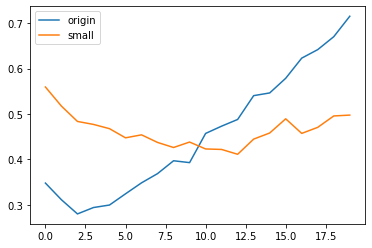

In [16]:
plt.plot(original.index,original.val_loss,label='origin')
plt.plot(smaller.index,smaller.val_loss,label='small')
plt.legend()

초기모델은 2번 에포크 이후 과대적합되기 시작하는데, 작은 모델은 11번 에포크 쯤부터 과대적합되기 시작함.

### 더 큰 모델과 원래모델 비교

In [18]:
model=keras.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')
history3=model.fit(train_data,train_label,
                 epochs=20,batch_size=512,validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 8s 183ms/step - loss: 0.5011 - accuracy: 0.7789 - val_loss: 0.3782 - val_accuracy: 0.8288
Epoch 2/20
40/40 [==============================] - 7s 167ms/step - loss: 0.2275 - accuracy: 0.9113 - val_loss: 0.3233 - val_accuracy: 0.8724
Epoch 3/20
40/40 [==============================] - 7s 165ms/step - loss: 0.1386 - accuracy: 0.9460 - val_loss: 0.3293 - val_accuracy: 0.8910
Epoch 4/20
40/40 [==============================] - 7s 164ms/step - loss: 0.0813 - accuracy: 0.9714 - val_loss: 0.4243 - val_accuracy: 0.8562
Epoch 5/20
40/40 [==============================] - 7s 163ms/step - loss: 0.0851 - accuracy: 0.9862 - val_loss: 0.3531 - val_accuracy: 0.8838
Epoch 6/20
40/40 [==============================] - 7s 166ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 0.5645 - val_accuracy: 0.8892
Epoch 7/20
40/40 [==============================] - 7s 166ms/step - loss: 5.1420e-04 - accuracy: 1.0000 - val_loss: 0.7421 - val_accuracy: 0.8876
Ep

In [19]:
larger=pd.DataFrame(history3.history,columns=history3.history.keys())
larger

,loss,accuracy,val_loss,val_accuracy
0,5.011193e-01,0.77895,0.378246,0.8288
1,2.274620e-01,0.91130,0.323323,0.8724
2,1.386482e-01,0.94600,0.329315,0.8910
3,8.132304e-02,0.97135,0.424345,0.8562
4,8.513910e-02,0.98620,0.353063,0.8838
5,5.813564e-03,0.99960,0.564454,0.8892
6,5.141954e-04,1.00000,0.742105,0.8876
7,2.220016e-01,0.98370,0.678086,0.8858
8,1.113601e-03,0.99990,0.739906,0.8808
9,1.697401e-04,1.00000,0.793415,0.8884


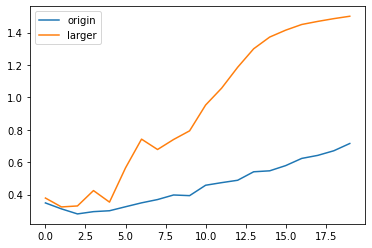

In [20]:
plt.plot(original.index,original.val_loss,label='origin')
plt.plot(larger.index,larger.val_loss,label='larger')
plt.legend()

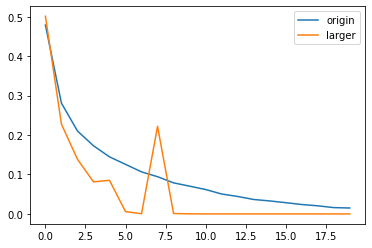

In [22]:
plt.plot(original.index,original.loss,label='origin')
plt.plot(larger.index,larger.loss,label='larger')
plt.legend()

더 큰 용량의 모델이 과대 적합이 거의 바로 시작되어 갈수록 검증 손실이 크게 늘어남 하지만 훈련 손실은 계속해서 낮아져 0에 근접하게 됨.  
용량이 많은 모델일수록 훈련데이터를 더 빨리 모델링하지만 과대적합에 매우 민감해지는 모습을 보임.(훈련과 검증사이에 성능차이가 엄청 커지게됨.)